In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
from scipy.stats import trim_mean

In [12]:
data=pd.read_csv('lca.csv')
print("type :", type(data))
print("info : ", data.info())
# print(data[1:10])
# print(data.tail())
# print(data.head())
print(data.describe())


type : <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21255 entries, 0 to 21254
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Activity UUID_Product UUID           21255 non-null  object 
 1   Activity Name                        21255 non-null  object 
 2   Geography                            21246 non-null  object 
 3   Reference Product Name               21255 non-null  object 
 4   Reference Product Unit               21255 non-null  object 
 5   Reference Product Amount             21255 non-null  int64  
 6   acidification                        21255 non-null  float64
 7   climate change                       21255 non-null  float64
 8   ecotoxicity: freshwater              21255 non-null  float64
 9   ecotoxicity: marine                  21255 non-null  float64
 10  ecotoxicity: terrestrial             21255 non-nu

## Adding new column 

In [15]:
data['new_column']=data['climate change']*2
data


,Activity UUID_Product UUID,Activity Name,Geography,Reference Product Name,Reference Product Unit,Reference Product Amount,acidification,climate change,ecotoxicity: freshwater,ecotoxicity: marine,ecotoxicity: terrestrial,energy resources: non-renewable,eutrophication,human toxicity,material resources: metals/minerals,ozone depletion,photochemical oxidant formation,new_column
0,9bb46480-2488-5ae2-a13e-2960c21f7059_807906d0-...,"1,1-difluoroethane production, HFC-152a",RoW,"1,1-difluoroethane, HFC-152a",kg,1,0.034765,5.984021,4.364838,12557.910170,0.050378,45.390755,0.008053,10.636273,0.000111,5.340000e-08,0.002062,11.968042
1,d8507e55-1d42-5a18-af75-284122663d18_807906d0-...,"1,1-difluoroethane production, HFC-152a",US,"1,1-difluoroethane, HFC-152a",kg,1,0.032611,5.939088,4.931933,13098.656990,0.055179,45.538618,0.008210,12.131317,0.000135,5.470000e-08,0.001968,11.878177
2,58c41b3a-abc7-51d8-9bd8-e392c4a02a7f_c6c77fb4-...,"1,1-dimethylcyclopentane to generic market for...",GLO,"solvent, organic",kg,1,0.005272,1.250510,0.562227,1050.557016,0.012268,63.085556,0.001242,1.653780,0.000010,6.390000e-08,0.002577,2.501021
3,b77841d7-b2fa-5954-b904-a88edd5064f4_95aedd09-...,1-methoxy-2-propanol production,GLO,1-methoxy-2-propanol,kg,1,0.015952,3.937159,2.513086,5490.849485,0.037201,74.676672,0.014002,5.877925,0.000043,1.170000e-06,0.002264,7.874318
4,fdf9e41c-6d05-536a-836f-59ed4c145de0_e24e6570-...,1-methylcyclopropene production,GLO,1-methylcyclopropene,kg,1,0.035122,8.523491,5.093069,10588.647860,0.077037,142.025055,0.138759,11.828473,0.000095,1.420000e-06,0.008167,17.046982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21250,09c98df7-01e7-5f46-a69d-35cb53c2708e_08663c56-...,zirconium oxide to generic market for electrol...,GLO,"electrolyte, for solid oxide fuel cell",kg,1,0.024728,4.115478,2.780973,7053.788198,0.035297,46.408201,0.009264,5.515701,0.000039,1.100000e-06,0.001348,8.230955
21251,5ff711ec-8930-5a78-8d88-498694b32c26_11985fce-...,"zirconium sponge production, from zirconium te...",FR,"zirconium sponge, nuclear-grade",kg,1,0.104013,18.674826,111.232752,136407.918000,0.150744,227.492022,0.053749,61.786799,0.000112,3.950000e-06,0.059877,37.349653
21252,0658b955-2242-5b70-9d24-89e2380cec12_11985fce-...,"zirconium sponge production, from zirconium te...",RoW,"zirconium sponge, nuclear-grade",kg,1,0.184453,33.696399,114.974842,156109.008400,0.166643,363.562285,0.073945,71.592693,0.000116,3.940000e-06,0.064530,67.392798
21253,e08204e4-83f0-556d-aafa-1e4218af6e16_11985fce-...,"zirconium sponge production, from zirconium te...",US,"zirconium sponge, nuclear-grade",kg,1,0.172255,31.156864,114.984899,152999.044700,0.160659,351.710329,0.074123,68.640828,0.000115,3.900000e-06,0.063675,62.313728


## Renaming column name

In [17]:
data.rename(columns={'new_column':'newColumn'},inplace=True)

In [18]:
data

,Activity UUID_Product UUID,Activity Name,Geography,Reference Product Name,Reference Product Unit,Reference Product Amount,acidification,climate change,ecotoxicity: freshwater,ecotoxicity: marine,ecotoxicity: terrestrial,energy resources: non-renewable,eutrophication,human toxicity,material resources: metals/minerals,ozone depletion,photochemical oxidant formation,newColumn
0,9bb46480-2488-5ae2-a13e-2960c21f7059_807906d0-...,"1,1-difluoroethane production, HFC-152a",RoW,"1,1-difluoroethane, HFC-152a",kg,1,0.034765,5.984021,4.364838,12557.910170,0.050378,45.390755,0.008053,10.636273,0.000111,5.340000e-08,0.002062,11.968042
1,d8507e55-1d42-5a18-af75-284122663d18_807906d0-...,"1,1-difluoroethane production, HFC-152a",US,"1,1-difluoroethane, HFC-152a",kg,1,0.032611,5.939088,4.931933,13098.656990,0.055179,45.538618,0.008210,12.131317,0.000135,5.470000e-08,0.001968,11.878177
2,58c41b3a-abc7-51d8-9bd8-e392c4a02a7f_c6c77fb4-...,"1,1-dimethylcyclopentane to generic market for...",GLO,"solvent, organic",kg,1,0.005272,1.250510,0.562227,1050.557016,0.012268,63.085556,0.001242,1.653780,0.000010,6.390000e-08,0.002577,2.501021
3,b77841d7-b2fa-5954-b904-a88edd5064f4_95aedd09-...,1-methoxy-2-propanol production,GLO,1-methoxy-2-propanol,kg,1,0.015952,3.937159,2.513086,5490.849485,0.037201,74.676672,0.014002,5.877925,0.000043,1.170000e-06,0.002264,7.874318
4,fdf9e41c-6d05-536a-836f-59ed4c145de0_e24e6570-...,1-methylcyclopropene production,GLO,1-methylcyclopropene,kg,1,0.035122,8.523491,5.093069,10588.647860,0.077037,142.025055,0.138759,11.828473,0.000095,1.420000e-06,0.008167,17.046982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21250,09c98df7-01e7-5f46-a69d-35cb53c2708e_08663c56-...,zirconium oxide to generic market for electrol...,GLO,"electrolyte, for solid oxide fuel cell",kg,1,0.024728,4.115478,2.780973,7053.788198,0.035297,46.408201,0.009264,5.515701,0.000039,1.100000e-06,0.001348,8.230955
21251,5ff711ec-8930-5a78-8d88-498694b32c26_11985fce-...,"zirconium sponge production, from zirconium te...",FR,"zirconium sponge, nuclear-grade",kg,1,0.104013,18.674826,111.232752,136407.918000,0.150744,227.492022,0.053749,61.786799,0.000112,3.950000e-06,0.059877,37.349653
21252,0658b955-2242-5b70-9d24-89e2380cec12_11985fce-...,"zirconium sponge production, from zirconium te...",RoW,"zirconium sponge, nuclear-grade",kg,1,0.184453,33.696399,114.974842,156109.008400,0.166643,363.562285,0.073945,71.592693,0.000116,3.940000e-06,0.064530,67.392798
21253,e08204e4-83f0-556d-aafa-1e4218af6e16_11985fce-...,"zirconium sponge production, from zirconium te...",US,"zirconium sponge, nuclear-grade",kg,1,0.172255,31.156864,114.984899,152999.044700,0.160659,351.710329,0.074123,68.640828,0.000115,3.900000e-06,0.063675,62.313728


## Finding mean of data

In [19]:
mean=data.newColumn.mean()
mean

70865561.0069182

In [22]:
mean=data['climate change'].mean()
mean

35432780.5034591

In [24]:
median=data['climate change'].median()
print(median)



0.734719428


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 [Text(0, 0, '0.0010129030000000001'),
  Text(1, 0, '0.039765818'),
  Text(2, 0, '0.145140224'),
  Text(3, 0, '0.302903026'),
  Text(4, 0, '0.357783476'),
  Text(5, 0, '0.37041242799999996'),
  Text(6, 0, '0.37364398200000004'),
  Text(7, 0, '0.376418707'),
  Text(8, 0, '0.37832865'),
  Text(9, 0, '0.4135525'),
  Text(10, 0, '0.41400373700000004'),
  Text(11, 0, '0.455547071'),
  Text(12, 0, '0.53808381'),
  Text(13, 0, '0.582896077'),
  Text(14, 0, '0.855288064'),
  Text(15, 0, '1.043991114'),
  Text(16, 0, '1.061330595'),
  Text(17, 0, '1.069352343')

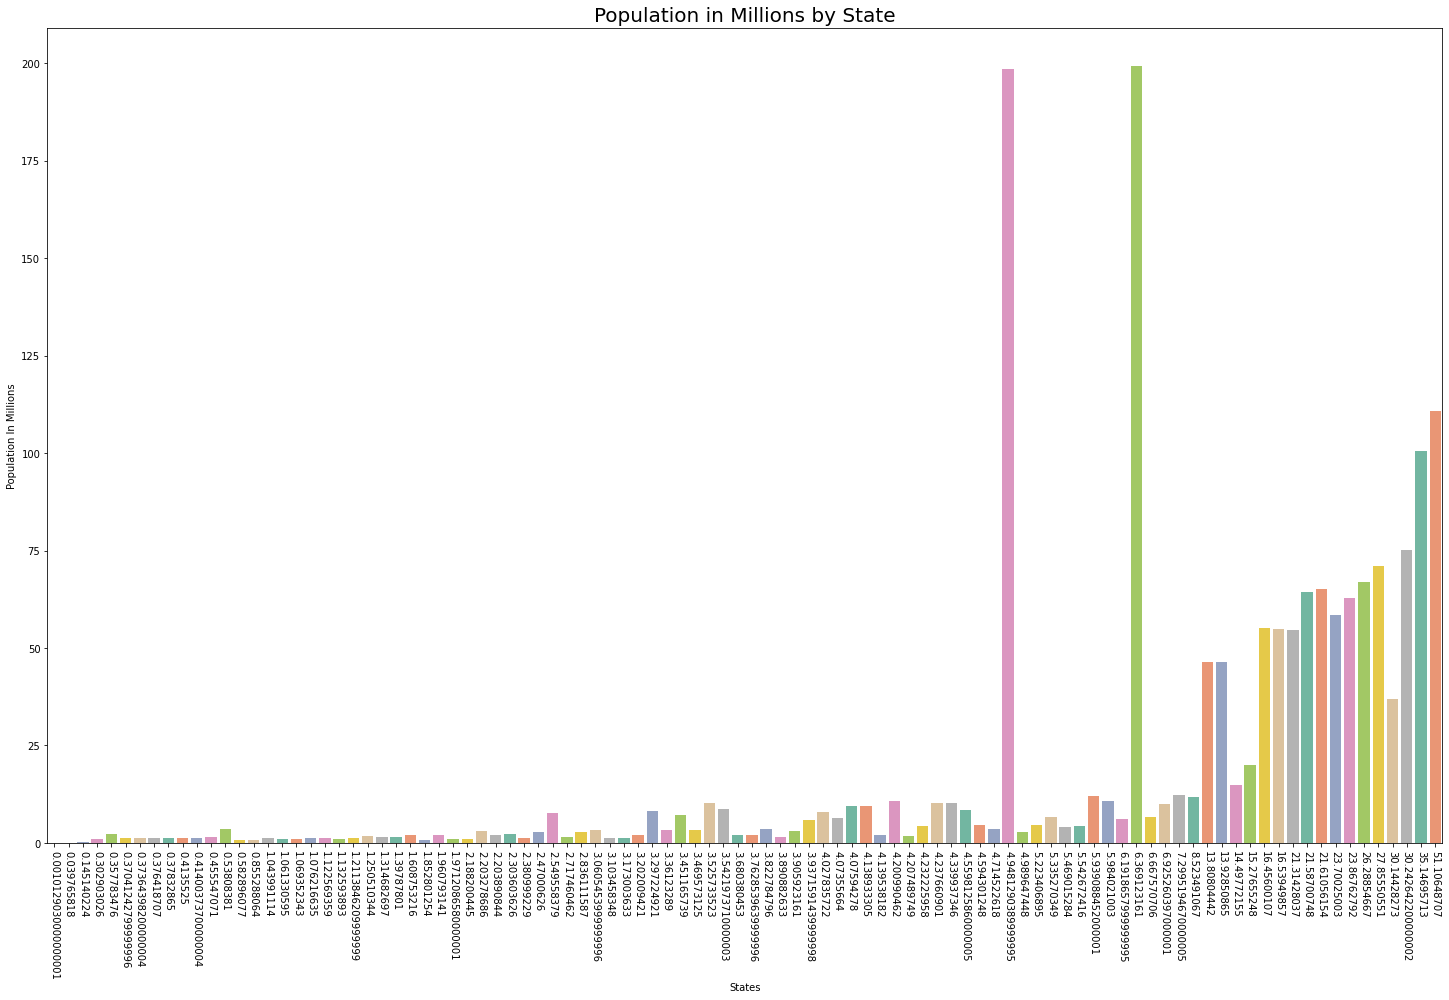

In [37]:
data=data[:100]
# Plot Population In Millions
fig, ax1 = plt.subplots()
fig.set_size_inches(25,  15)
  
  
ax1 = sns.barplot(x ="climate change", y ="human toxicity", 
                  data = data.sort_values('newColumn'), 
                                        palette ="Set2")
  
ax1.set(xlabel ='States', ylabel ='Population In Millions')
ax1.set_title('Population in Millions by State', size = 20)
  
plt.xticks(rotation =-90)

<AxesSubplot:>

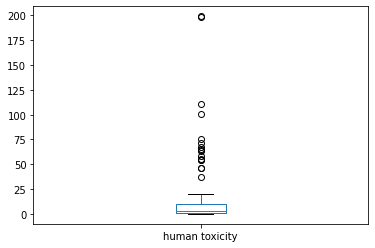

In [38]:
data.boxplot(column =['human toxicity'], grid = False)

<AxesSubplot:>

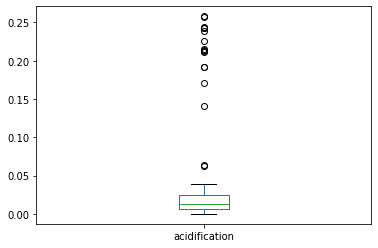

In [39]:
data.boxplot(column =['acidification'], grid = False)

<AxesSubplot:title={'center':'ozone depletion'}, xlabel='Geography'>

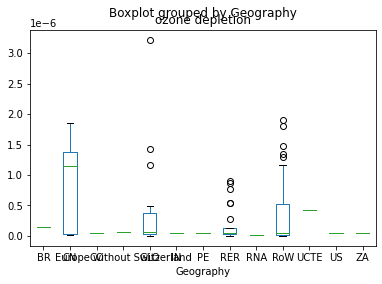

In [40]:
data.boxplot(by='Geography',column =['ozone depletion'], grid = False)